In [1]:
push!(LOAD_PATH, "..")
using ASE
using PyPlot
using PyCall

In [4]:
at = bulk("Al")
at = repeat(at, (5, 5, 5))
X = get_positions(at)
nlist = ASENeighborList(at, 3.0; self_interaction=false, bothways=true)


ASE.ASENeighborList(PyObject <ase.calculators.neighborlist.NeighborList instance at 0x317cf6638>)

s = [2.8637824638055176 5.727564927611035 2.8637824638055176 4.960216729135936 5.727564927611035 2.8637824638055176 4.960216729135936 4.960216729135936 5.727564927611035 5.727564927611036 2.863782463805518 4.9602167291359365 2.8637824638055176 5.727564927611035 4.960216729135936 5.727564927611036 4.9602167291359365 5.727564927611035 2.863782463805518 2.8637824638055176 4.960216729135935 4.9602167291359365 4.9602167291359365 2.8637824638055176 4.9602167291359365 4.05 6.403612261840967 6.403612261840967 4.9602167291359365 4.960216729135936 6.403612261840967 6.403612261840969 2.8637824638055176 4.05 6.403612261840967 6.403612261840969 4.050000000000001 5.727564927611035 4.960216729135936 6.403612261840967 6.403612261840967 5.727564927611035 6.403612261840967 6.403612261840969 4.960216729135935 6.403612261840967 6.403612261840969 4.960216729135935 5.727564927611036 4.9602167291359365 5.727564927611035 4.9602167291359365 4.960216729135936 6.403612261840967 6.403612261840969 5.72756492761103

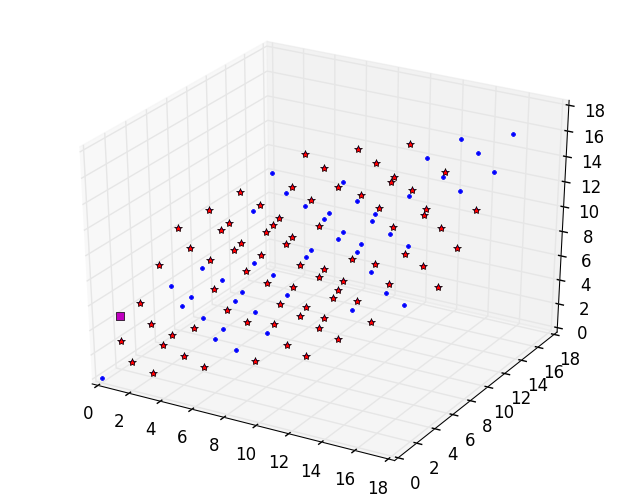

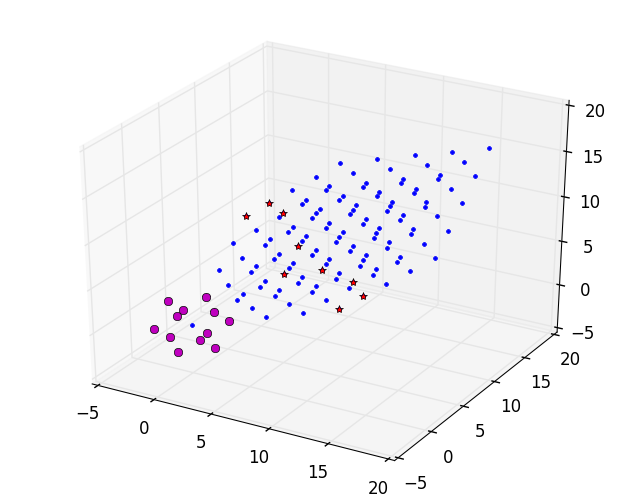

1-element Array{Any,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x31b7ff510>


cutoffs[n] = 3.3
s .^ 2 = [8.20125 32.805 8.20125 24.603749999999998 32.805 8.20125 24.603749999999998 24.603749999999998 32.805 32.805000000000014 8.201250000000003 24.60375000000001 8.20125 32.805 24.603749999999998 32.805000000000014 24.60375000000001 32.805 8.201250000000003 8.20125 24.60374999999999 24.60375000000001 24.60375000000001 8.20125 24.60375000000001 16.4025 41.006249999999994 41.006249999999994 24.60375000000001 24.603749999999998 41.006249999999994 41.006250000000016 8.20125 16.4025 41.006249999999994 41.006250000000016 16.402500000000007 32.805 24.603749999999998 41.006249999999994 41.006249999999994 32.805 41.006249999999994 41.006250000000016 24.60374999999999 41.006249999999994 41.006250000000016 24.60374999999999 32.805000000000014 24.60375000000001 32.805 24.60375000000001 24.603749999999998 41.006249999999994 41.006250000000016 32.805 41.006249999999994 41.006250000000016 41.006250000000016 41.006250000000016 8.201250000000003 8.20125 24.60374999999999 24.60375

In [5]:

figure(1)
I, _ = get_neighbors(1, nlist)
plot3D(X[1,:][:], X[2,:][:], X[3,:][:], "b.")
plot3D(X[1,I][:], X[2,I][:], X[3,I][:], "r*")
plot3D([X[1,1];], [X[1,2];], [X[1,3];], "ms")

figure(2)
I, _, r = neighbors(1, nlist, at)
plot3D(X[1,:][:], X[2,:][:], X[3,:][:], "b.")
plot3D(X[1,I][:], X[2,I][:], X[3,I][:], "r*")
r .+= X[:,1]
plot3D(slice(r, 1,:), slice(r,2,:), slice(r,3,:), "mo")



 # Some Benchmarking

In [5]:
push!(LOAD_PATH, "..")
using ASE
using ProfileView

function loop_neigs(at, nlist)
    for n = 1:length(at)
        I, s, r = neighbors(n, nlist, at)
    end
end

function loop_neigs2(at, nlist)
    for (n, I, s, r) in (at, nlist)
        nothing
    end
end

at = bulk("Al")
at = repeat(at, (8, 8, 8))
nlist = ASENeighborList(at, 1.5; self_interaction=false, bothways=true)


@time loop_neigs(at, nlist)
@time loop_neigs(at, nlist)
@time loop_neigs2(at, nlist)
@time loop_neigs2(at, nlist)



  3.658742 seconds (850.25 k allocations: 41.489 MB, 0.83% gc time)
  3.654953 seconds (848.35 k allocations: 41.395 MB, 0.99% gc time)
  2.293996 seconds (458.25 k allocations: 28.058 MB, 0.50% gc time)
  2.227309 seconds (454.09 k allocations: 27.870 MB, 0.67% gc time)


In [3]:
Profile.clear()
@profile loop_neigs2(at, nlist)


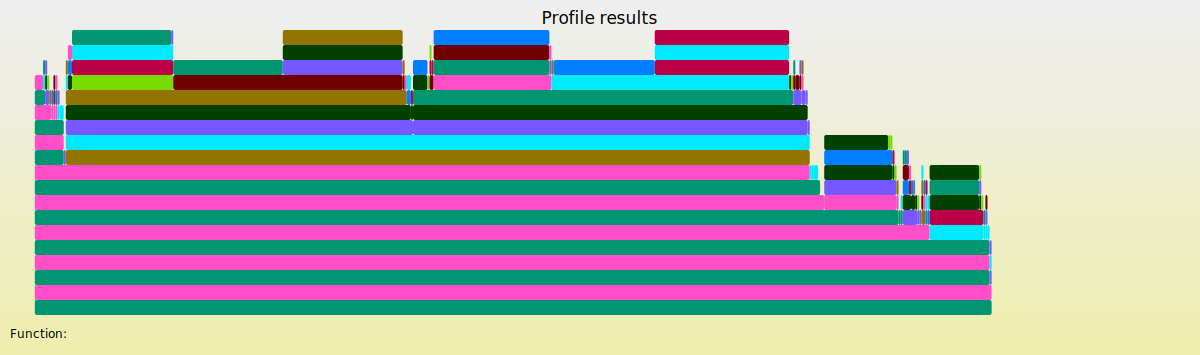

In [4]:
ProfileView.view()


In [16]:
using PyCall


In [62]:
# Standard call: 0.356330 seconds (89.00 k allocations: 3.258 MB)
@time for n = 1:500 I, off = nlist.po[:get_neighbors](0); end   
# get a tuple of PyArrays: 0.379282 seconds (62.00 k allocations: 2.022 MB)
@time for n = 1:500 ret = pycall(nlist.po[:get_neighbors], Tuple{PyArray, PyArray}, 0); end
# just get a PyObject: 0.042462 seconds (9.50 k allocations: 273.438 KB)
@time for n = 1:500 ret = pycall(nlist.po[:get_neighbors], PyObject, 0); end
nothing

  0.356330 seconds (89.00 k allocations: 3.258 MB)
  0.379282 seconds (62.00 k allocations: 2.022 MB)
  0.042462 seconds (9.50 k allocations: 273.438 KB)


In [61]:
ret = pycall(nlist.po[:get_neighbors], PyObject, 0);
typeof(ret)

PyCall.PyObject